In [2]:
import shap
import keras
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Dense, Reshape, Flatten, Input, Dropout
from keras.optimizers import Adam, SGD, RMSprop
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
# salinity only, sine forcing 
input_data = np.load('data/input_sal_temp_sine.npy')
output_data = np.load('data/output_sal_temp_sine.npy')

In [4]:
X_train, X_rem, y_train, y_rem = train_test_split(input_data, output_data, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)
scaler.mean_,scaler.scale_

X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
input_scaled = scaler.transform(input_data)

Y_train = keras.utils.to_categorical(y_train)
Y_val = keras.utils.to_categorical(y_val)
Y_test = keras.utils.to_categorical(y_test)

In [98]:
X_train500 = shap.sample(X_train_scaled, 500)
X_val500 = shap.sample(X_val_scaled, 500)
shap_values_list = []

In [99]:
for i in range(10):
    
    print(i)
    
    model = Sequential()
    model.add(Dense(12, input_dim=5, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(3, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    
    model.load_weights('models/stommel_model_ts_sine_'+str(i)+'.h5')
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    explainer = shap.KernelExplainer(model.predict, X_train500, feature_names=['time', 'salinity', 'temperature', 'salinity forcing', 'temperature forcing'])
    shap_values = explainer.shap_values(X_val500)
    shap_values_list.append(shap_values)    

0
16/16 [==============================] - 0s 2ms/step


Using 500 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/500 [00:00<?, ?it/s]

1/1 [==============================] - 0s 16ms/step


469/469 [==============================] - 0s 813us/step


469/469 [==============================] - 0s 956us/step


469/469 [==============================] - 0s 947us/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 20ms/step


469/469 [==============================] - 0s 592us/step
1
16/16 [==============================] - 0s 1ms/step


Using 500 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/500 [00:00<?, ?it/s]

469/469 [==============================] - 0s 616us/step


469/469 [==============================] - 0s 606us/step


469/469 [==============================] - 0s 769us/step


469/469 [==============================] - 0s 598us/step


469/469 [==============================] - 0s 731us/step


469/469 [==============================] - 0s 711us/step


469/469 [==============================] - 0s 717us/step
2
16/16 [==============================] - 0s 908us/step


Using 500 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/500 [00:00<?, ?it/s]

469/469 [==============================] - 1s 1ms/step


469/469 [==============================] - 0s 612us/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 15ms/step


469/469 [==============================] - 0s 607us/step


469/469 [==============================] - 0s 588us/step


469/469 [==============================] - 0s 915us/step
3
16/16 [==============================] - 0s 818us/step


Using 500 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/500 [00:00<?, ?it/s]

469/469 [==============================] - 0s 917us/step


469/469 [==============================] - 0s 1ms/step


469/469 [==============================] - 0s 592us/step


469/469 [==============================] - 0s 578us/step


469/469 [==============================] - 0s 612us/step


469/469 [==============================] - 0s 792us/step


469/469 [==============================] - 0s 625us/step
4
16/16 [==============================] - 0s 2ms/step


Using 500 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/500 [00:00<?, ?it/s]

469/469 [==============================] - 0s 886us/step


469/469 [==============================] - 0s 643us/step


469/469 [==============================] - 0s 634us/step


469/469 [==============================] - 0s 750us/step


469/469 [==============================] - 0s 565us/step


469/469 [==============================] - 0s 561us/step


469/469 [==============================] - 0s 713us/step
5
16/16 [==============================] - 0s 893us/step


Using 500 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/500 [00:00<?, ?it/s]

469/469 [==============================] - 0s 638us/step


469/469 [==============================] - 1s 1ms/step


469/469 [==============================] - 0s 724us/step


469/469 [==============================] - 0s 726us/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


469/469 [==============================] - 0s 935us/step
6
16/16 [==============================] - 0s 1ms/step


Using 500 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/500 [00:00<?, ?it/s]

1/1 [==============================] - 0s 17ms/step


469/469 [==============================] - 0s 926us/step


1/1 [==============================] - 0s 18ms/step


469/469 [==============================] - 1s 1ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 14ms/step


469/469 [==============================] - 0s 681us/step
7
16/16 [==============================] - 0s 1ms/step


Using 500 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/500 [00:00<?, ?it/s]

469/469 [==============================] - 0s 793us/step


469/469 [==============================] - 0s 816us/step


469/469 [==============================] - 1s 1ms/step


469/469 [==============================] - 0s 726us/step


469/469 [==============================] - 0s 754us/step


469/469 [==============================] - 1s 1ms/step


469/469 [==============================] - 1s 1ms/step
8
16/16 [==============================] - 0s 2ms/step


Using 500 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/500 [00:00<?, ?it/s]

1/1 [==============================] - 0s 18ms/step


469/469 [==============================] - 1s 1ms/step


469/469 [==============================] - 0s 941us/step


469/469 [==============================] - 0s 816us/step


469/469 [==============================] - 0s 991us/step


1/1 [==============================] - 0s 24ms/step


469/469 [==============================] - 0s 868us/step
9
16/16 [==============================] - 0s 880us/step


Using 500 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/500 [00:00<?, ?it/s]

469/469 [==============================] - 0s 797us/step


1/1 [==============================] - 0s 22ms/step


469/469 [==============================] - 1s 1ms/step


1/1 [==============================] - 0s 32ms/step


469/469 [==============================] - 0s 767us/step


469/469 [==============================] - 0s 805us/step


469/469 [==============================] - 0s 791us/step


In [100]:
shap_values_list_np = np.array(shap_values_list)

In [101]:
shap_values_list_np.shape

(10, 2, 500, 5)

In [102]:
shap_values_mean = np.mean(shap_values_list_np, axis=0)

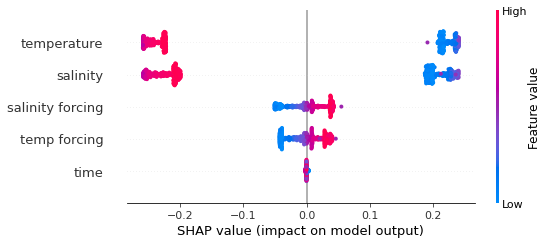

In [105]:
shap.summary_plot(shap_values_mean[1], X_val500, feature_names=['time', 'salinity', 'temperature', 'salinity forcing', 'temp forcing'])

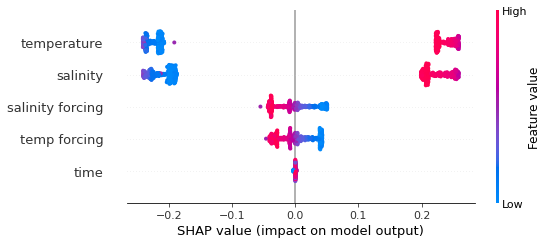

In [106]:
shap.summary_plot(shap_values_mean[0], X_val500, feature_names=['time', 'salinity', 'temperature', 'salinity forcing', 'temp forcing'])

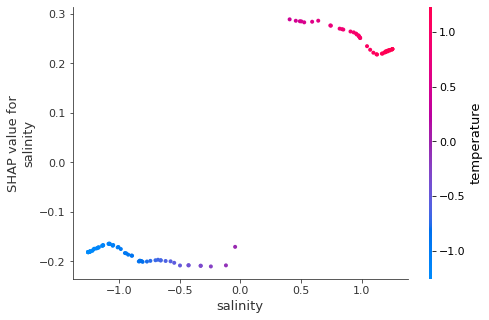

In [14]:
shap.dependence_plot(1, shap_values_mean[0], X_val100, feature_names=['time', 'salinity', 'temperature', 'salinity forcing', 'temp forcing'])

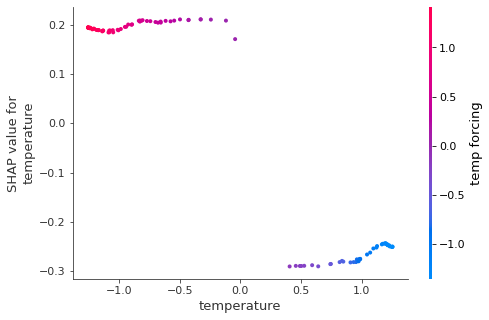

In [16]:
shap.dependence_plot(2, shap_values_mean[1], X_val100, feature_names=['time', 'salinity', 'temperature', 'salinity forcing', 'temp forcing'])

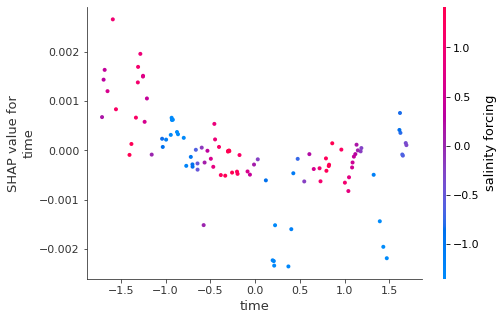

In [20]:
shap.dependence_plot(0, shap_values_mean[1], X_val100, feature_names=['time', 'salinity', 'temperature', 'salinity forcing', 'temp forcing'])

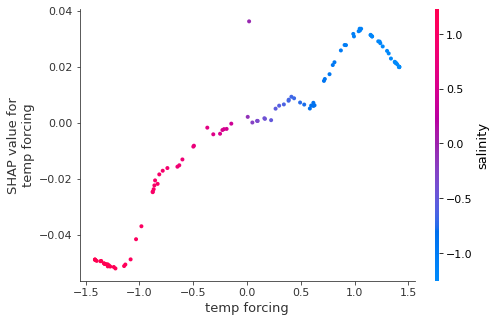

In [22]:
shap.dependence_plot(4, shap_values_mean[1], X_val100, feature_names=['time', 'salinity', 'temperature', 'salinity forcing', 'temp forcing'])

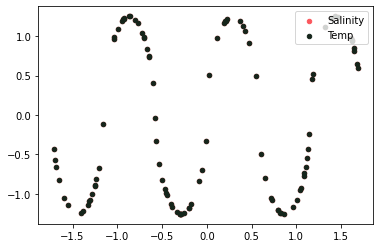

In [39]:
plt.scatter(X_val100[:, 0], X_val100[:, 1], label='Salinity', s=20, color = '#FB575D');
plt.scatter(X_val100[:, 0], X_val100[:, 2], label='Temp', s=20, color = '#15251B');
plt.legend(loc='upper right');

In [107]:
transformed_X = scaler.inverse_transform(X_val500)
qvals = []
alpha=0.2; 
beta=0.8; 
k=10e9
for x in transformed_X: 
    DeltaT = x[2]
    DeltaS = x[1]
    qvals.append(-k*(-alpha*DeltaT + beta*DeltaS))

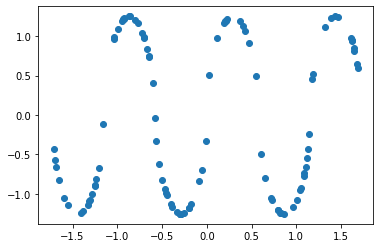

In [41]:
plt.scatter(X_val100[:, 0], X_val100[:, 1])

In [24]:
k=1e9
alpha=0.2
beta=0.8

In [25]:
def get_q_color(DeltaT, DeltaS):
    q = -k*(-alpha*DeltaT + beta*DeltaS)
    if q < 0:
        return 'r'
    else:
        return 'b'

In [26]:
shap_values_mean[1][:, ].shape

(100, 5)

In [27]:
plt.scatter(X_val100[:, 2], shap_values_mean[1][:, 2], color=get_q_color(X_val100[:, 2], X_val100[:, 1]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

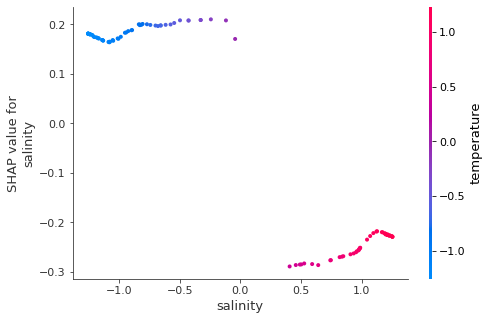

In [28]:
shap.dependence_plot(1, shap_values_mean[1], X_val100, feature_names=['time', 'salinity', 'temperature', 'forcing'])

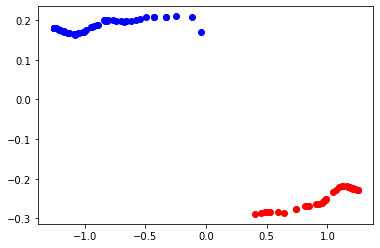

In [29]:
for i in range(100):
    plt.scatter(X_val100[:, 1][i], shap_values_mean[1][:, 1][i], color=get_q_color(X_val100[:, 2][i], X_val100[:, 1][i]))

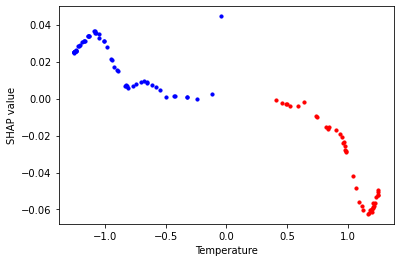

In [32]:
# blue positive q, red negative q
for i in range(100):
    plt.scatter(X_val100[:, 2][i], shap_values_mean[1][:, 3][i], color=get_q_color(X_val100[:, 2][i], X_val100[:, 1][i]), s=10)
plt.xlabel('Temperature');
plt.ylabel('SHAP value');

In [ ]:
def get_shap_color(sal, temp):
    if shap_values_mean

In [43]:
shap_values_mean.shape

(2, 100, 5)

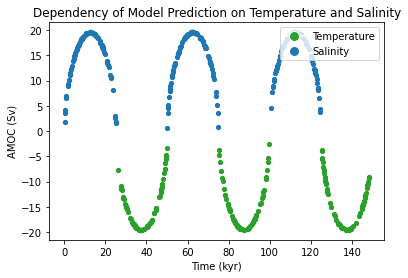

In [109]:
for i in range(500):
    # temp > salinity => green
    if shap_values_mean[0, i, 2] > shap_values_mean[0, i, 1]:
        plt.scatter(transformed_X[i, 0], -k*(-alpha*transformed_X[i, 2] + beta*transformed_X[i, 1])/1e9, marker='o', s=18, color='#2ca02c')
    else:
        plt.scatter(transformed_X[i, 0], -k*(-alpha*transformed_X[i, 2] + beta*transformed_X[i, 1])/1e9, marker='o', s=18, color='#1f77b4')

plt.xlabel('Time (kyr)');
plt.ylabel('AMOC (Sv)');
plt.title('Dependency of Model Prediction on Temperature and Salinity');

# Define custom legend labels and colors (0 corresponds to one color, 1 to another)
legend_labels = ['Temperature', 'Salinity']  # Custom labels
colors = ['#2ca02c', '#1f77b4']  # Corresponding colors for the categories

# Create custom legend handles
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]

# Add the custom legend to the plot
plt.legend(legend_handles, legend_labels, loc='upper right');
plt.savefig('dependency_plot_500', dpi=300)